**New York City Taxi Trip Duration**

#  New York City Taxi Trip Duration Prediction

This project aims to predict the **duration of individual taxi trips** in New York City based on the **2016 Yellow Cab trip record data**. The dataset was originally published by the NYC Taxi and Limousine Commission (TLC) and made available via Google BigQuery. For this playground competition, the data has been sampled and cleaned for easier use in model development.

# Dataset Description

The dataset contains key features for each trip. Participants are expected to use these features to predict trip durations in the test set.

**Files:**
- `train.csv` - Training set (**1,458,644 trip records**)
- `test.csv` - Testing set (**625,134 trip records**)
- `sample_submission.csv` - Sample submission file in the correct format

**Data Fields:**
- `id` - Unique identifier for each trip  
- `vendor_id` - Code indicating the provider associated with the trip record  
- `pickup_datetime` - Date and time when the meter was engaged  
- `dropoff_datetime` - Date and time when the meter was disengaged  
- `passenger_count` - Number of passengers in the vehicle (driver-entered value)  
- `pickup_longitude` / `pickup_latitude` - Coordinates where the trip started  
- `dropoff_longitude` / `dropoff_latitude` - Coordinates where the trip ended  
- `store_and_fwd_flag` - Indicates if the trip record was stored in the vehicle before sending to the server (`Y` = stored, `N` = not stored)  
- `trip_duration` - Duration of the trip in seconds (target variable)

> **Note:** Dropoff coordinates have been kept in the dataset to provide an expanded set of features for modeling.


**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Data Import**



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
sample_submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


**Exploratory Data Analysis (EDA)**  

In [ ]:
train.shape

(1458644, 11)

In [ ]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
train.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**Outlier Analysis**

In [ ]:
num_cols = train.select_dtypes(include=['int64','float64']).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')


In [ ]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [ ]:
for col in num_cols:
    outliers, lb, ub = detect_outliers(train, col)
    print(f"{col}: {outliers.shape[0]} outliers ({outliers.shape[0]/train.shape[0]*100:.2f}%) | Lower: {lb:.2f}, Upper: {ub:.2f}")

vendor_id: 0 outliers (0.00%) | Lower: -0.50, Upper: 3.50
passenger_count: 154830 outliers (10.61%) | Lower: -0.50, Upper: 3.50
pickup_longitude: 84322 outliers (5.78%) | Lower: -74.03, Upper: -73.93
pickup_latitude: 52743 outliers (3.62%) | Lower: 40.69, Upper: 40.81
dropoff_longitude: 77969 outliers (5.35%) | Lower: -74.03, Upper: -73.92
dropoff_latitude: 71990 outliers (4.94%) | Lower: 40.68, Upper: 40.82
trip_duration: 74220 outliers (5.09%) | Lower: -620.00, Upper: 2092.00


In [ ]:
def remove_outliers_iqr(df, cols):

    for col in cols:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Keep only values within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            print(f"{col}: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}, New shape = {df.shape}")
    return df


In [ ]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
train = remove_outliers_iqr(train, num_cols)

vendor_id: Lower = -0.50, Upper = 3.50, New shape = (1458644, 11)
passenger_count: Lower = -0.50, Upper = 3.50, New shape = (1303814, 11)
pickup_longitude: Lower = -74.03, Upper = -73.93, New shape = (1229022, 11)
pickup_latitude: Lower = 40.69, Upper = 40.81, New shape = (1208231, 11)
dropoff_longitude: Lower = -74.03, Upper = -73.92, New shape = (1155314, 11)
dropoff_latitude: Lower = 40.69, Upper = 40.82, New shape = (1120885, 11)
trip_duration: Lower = -455.00, Upper = 1745.00, New shape = (1084577, 11)


**Data Visualization**

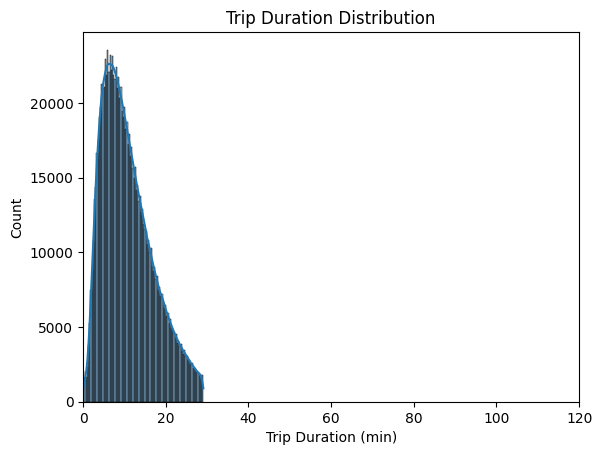

In [ ]:
sns.histplot(train['trip_duration']/60, bins=100, kde=True)
plt.xlim(0, 120); plt.xlabel("Trip Duration (min)"); plt.title("Trip Duration Distribution")
plt.show()

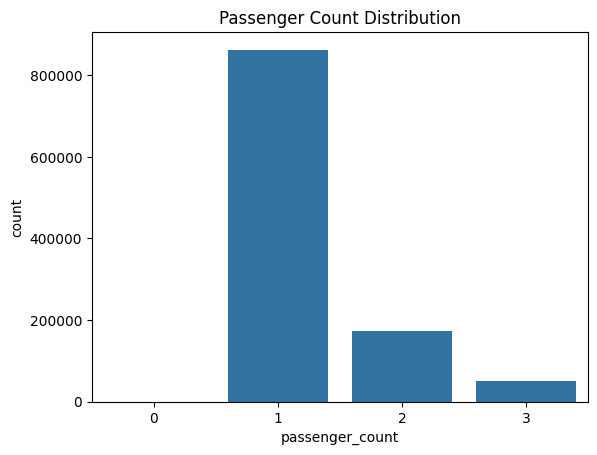

In [ ]:
sns.countplot(x='passenger_count', data=train)
plt.title("Passenger Count Distribution"); plt.show()

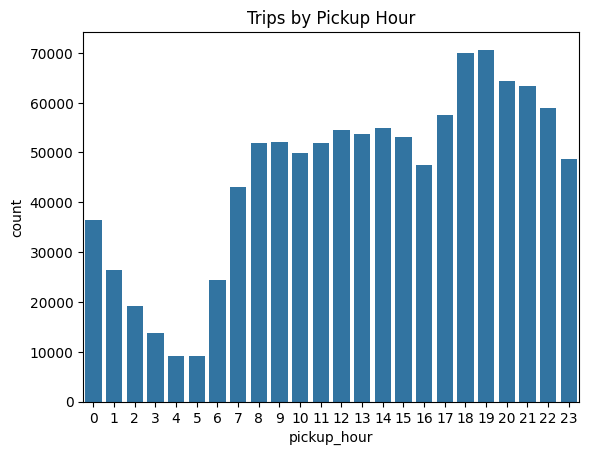

In [ ]:
train['pickup_hour'] = pd.to_datetime(train['pickup_datetime']).dt.hour
sns.countplot(x='pickup_hour', data=train)
plt.title("Trips by Pickup Hour"); plt.show()


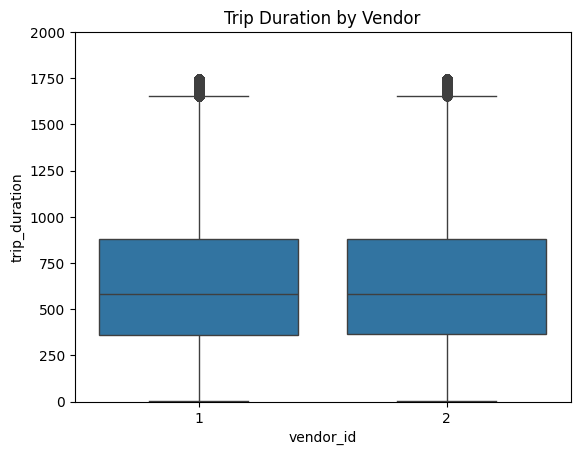

In [ ]:
sns.boxplot(x='vendor_id', y='trip_duration', data=train)
plt.ylim(0,2000); plt.title("Trip Duration by Vendor"); plt.show()


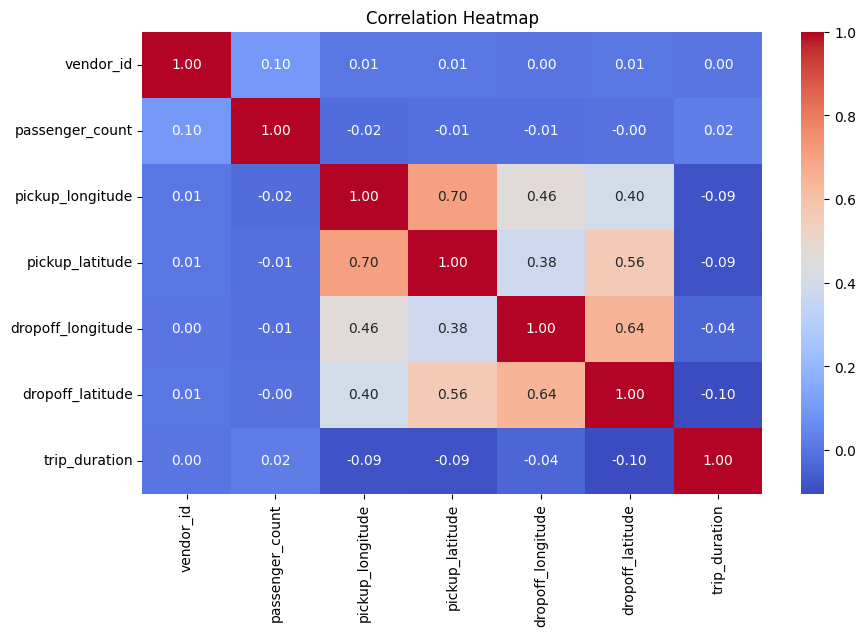

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=['int64','float64']).corr(),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Feature Engineering**

In [ ]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_month'] = train['pickup_datetime'].dt.month
train['is_weekend'] = train['pickup_weekday'].isin([5,6]).astype(int)

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

train['haversine_distance_km'] = haversine(
    train['pickup_latitude'], train['pickup_longitude'],
    train['dropoff_latitude'], train['dropoff_longitude']
)


In [ ]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'N':0, 'Y':1})

In [ ]:
train[['pickup_hour','pickup_weekday','pickup_month','is_weekend','haversine_distance_km','store_and_fwd_flag']].head()

,pickup_hour,pickup_weekday,pickup_month,is_weekend,haversine_distance_km,store_and_fwd_flag
0,17,0,3,0,1.498521,0
1,0,6,6,1,1.805507,0
3,19,2,4,0,1.485498,0
4,13,5,3,1,1.188588,0
8,23,4,5,0,1.310353,0


**Model Comparison & Selection**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import numpy as np
import pandas as pd

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

train_sample = train.sample(50000, random_state=42)
X_s = train_sample.drop(['id','trip_duration','dropoff_datetime','pickup_datetime'], axis=1)
y_s = train_sample['trip_duration']

X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

y_train_s = y_train_s.clip(lower=1)
y_val_s = y_val_s.clip(lower=1)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMRegressor(n_estimators=50, random_state=42, n_jobs=-1)
}

scores = {}
for name, model in models.items():
    model.fit(X_train_s, y_train_s)
    y_pred = model.predict(X_val_s)
    y_pred = np.clip(y_pred, a_min=1, a_max=None)
    scores[name] = rmsle(y_val_s, y_pred)

score_df = pd.DataFrame(list(scores.items()), columns=['Model','RMSLE']).sort_values('RMSLE')
best_model = score_df.iloc[0]['Model']

print("Model Performance:\n")
print(score_df.to_string(index=False))
print(f"\n🏆 Best Model: {best_model} -> RMSLE: {score_df.iloc[0]['RMSLE']:.5f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1356
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 13
[LightGBM] [Info] Start training from score 649.909850
Model Performance:

            Model    RMSLE
          XGBoost 0.401670
    Random Forest 0.408239
         LightGBM 0.413470
Linear Regression 0.496556
    Decision Tree 0.539982

🏆 Best Model: XGBoost -> RMSLE: 0.40167


**Train Final Model & Create Submission**

In [ ]:
for df in [train, test]:
    df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1}).fillna(0).astype(int)

In [ ]:
# Feature Engineering - Test Set
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_weekday'] = test['pickup_datetime'].dt.weekday
test['pickup_month'] = test['pickup_datetime'].dt.month
test['is_weekend'] = test['pickup_weekday'].isin([5, 6]).astype(int)

In [ ]:
R = 6371
test['haversine_distance_km'] = 2 * R * np.arcsin(np.sqrt(
    np.sin(np.radians((test['dropoff_latitude'] - test['pickup_latitude']) / 2)) ** 2 +
    np.cos(np.radians(test['pickup_latitude'])) * np.cos(np.radians(test['dropoff_latitude'])) *
    np.sin(np.radians((test['dropoff_longitude'] - test['pickup_longitude']) / 2)) ** 2
))


In [ ]:
X = train.drop(['id', 'trip_duration', 'dropoff_datetime', 'pickup_datetime'], axis=1).copy()
y = train['trip_duration'].clip(lower=1)
X_test = test[X.columns].copy()

In [ ]:
model = xgb.XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred_test = np.clip(model.predict(X_test), a_min=1, a_max=None)
submission = pd.DataFrame({'id': test['id'], 'trip_duration': y_pred_test})
submission.to_csv('submission.csv', index=False)

In [ ]:
joblib.dump(model, 'xgb_final_model.pkl')

['xgb_final_model.pkl']

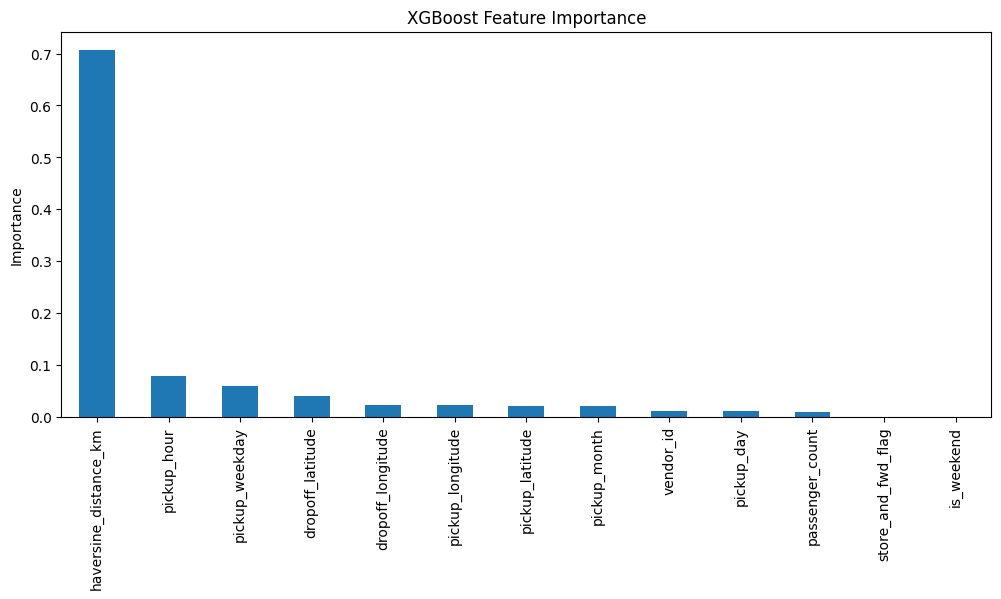

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title='XGBoost Feature Importance')
plt.ylabel('Importance')
plt.show()